In [1]:
import matplotlib
import matplotlib.font_manager
from matplotlib import pyplot as plt
import os
import numpy as np

In [2]:
# Set figure parameters
WIDTH = 1.5 * 8.3 / 2.54
DOUBLE_WIDTH = 1.5 * 17.1 / 2.54
DPI = 350
format='png'
matplotlib.rcParams.update(
    {
        'axes.labelsize': 14,
        'axes.xmargin': 0,
        'axes.ymargin': .1,
        'lines.markersize': 3,
        'figure.dpi': DPI,
        'figure.autolayout': True,
        'figure.figsize': (WIDTH, 3 * WIDTH / 4),
        'figure.facecolor': 'white',
        'font.size': 12,
        'grid.color': '0',
        'grid.linestyle': '-',
        'legend.edgecolor': '1',
        'legend.fontsize': 12,
        'xtick.labelsize': 12,
        'ytick.labelsize': 12,
        'font.family': "DeJavu Serif",
        'font.serif': ["Computer Modern Roman"],
        'mathtext.fontset': 'cm',
        'mathtext.rm': 'serif',
        'text.usetex': False
    }
)

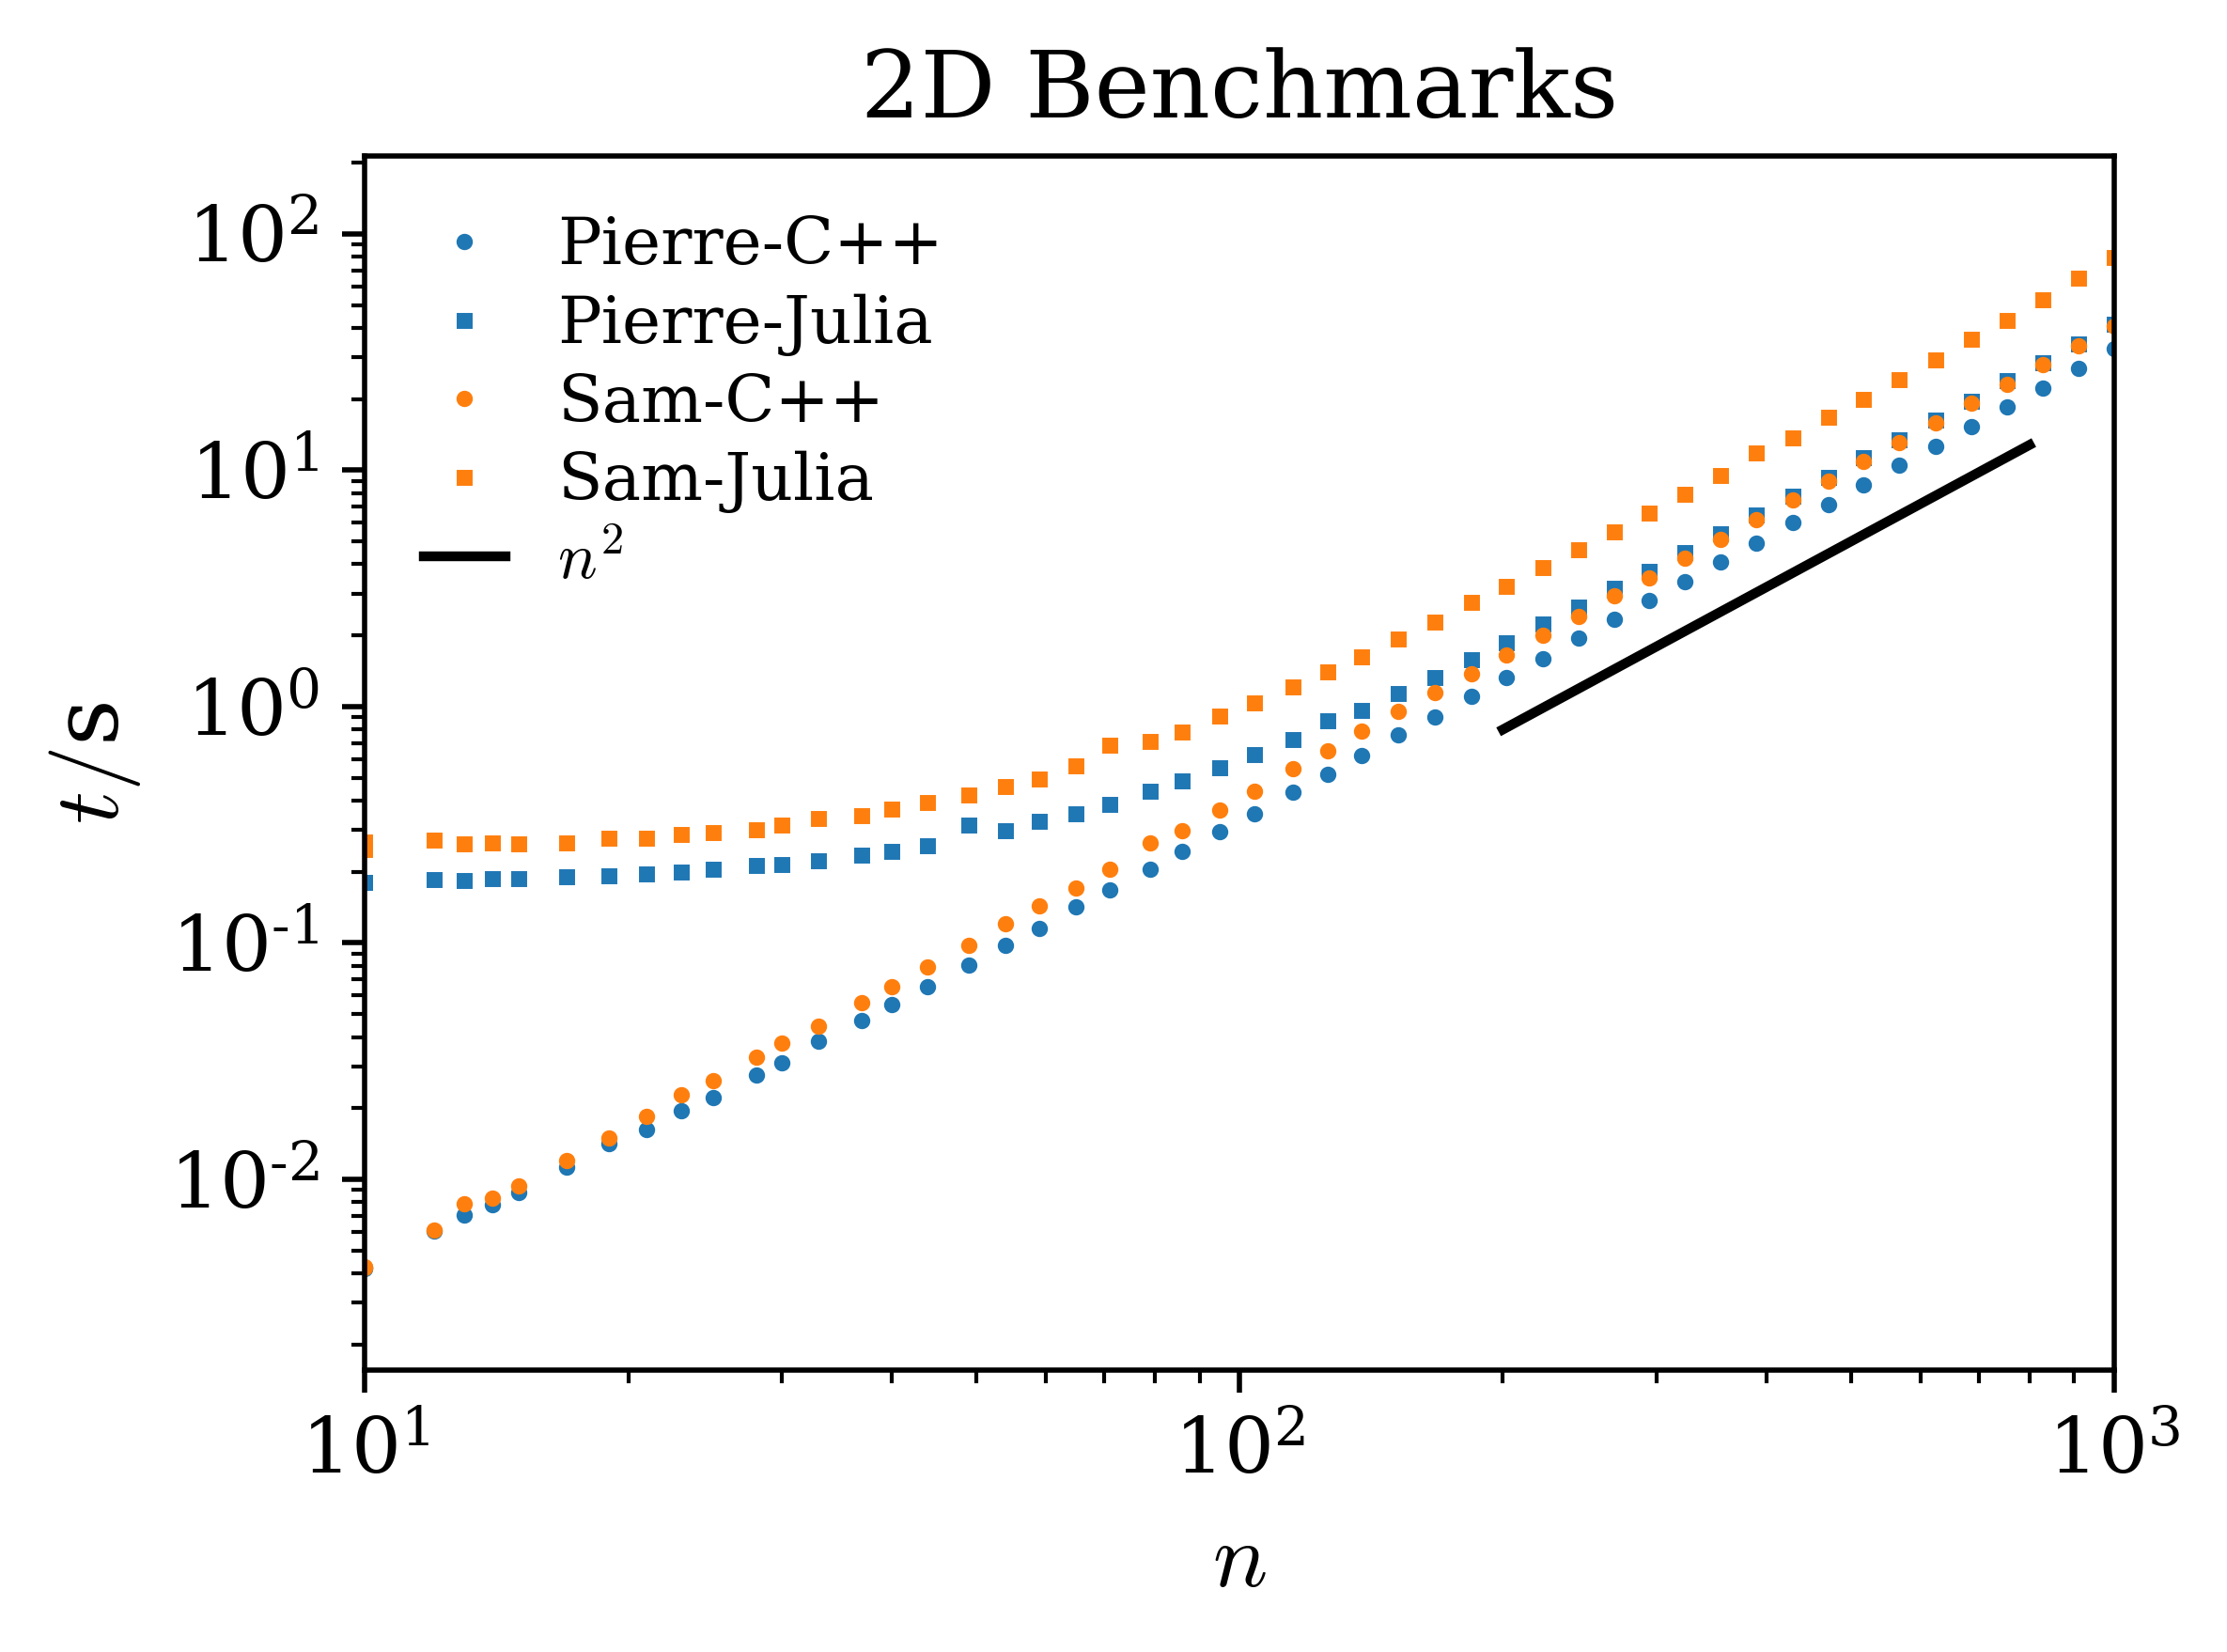

In [31]:
files = ["2d/data/Pierre_1000_0.1_0_2.dat",
         "2d/data/Sam_1000_0.1_0_2.dat"]

plt.figure(1,tight_layout=True)
for file in files:
    n = []
    tc = []
    tj = []

    name = file.split("/")[-1].split("_")[0]

    with open(file,"rb") as f:
        for line in f:
            n += [int(line.split()[0])]
            tc += [float(line.split()[1])]
            tj += [float(line.split()[2])]
    
    p, = plt.loglog(n,tc,".",label=name+"-C++")
    plt.loglog(n,tj,"s",markersize=1.5,color=p.get_color(),label=name+"-Julia")

x=np.linspace(200,800,2)
y=2e-5*x**2
plt.plot(x,y,'-k',label=r"$n^2$")
plt.xlabel(r'$n$')
plt.ylabel(r'$t / $s')
plt.title(rf'2D Benchmarks')
plt.legend(fontsize=10, handlelength=1.25, columnspacing=1, labelspacing=0.25)
plt.savefig("2d/figures/comparison.png")

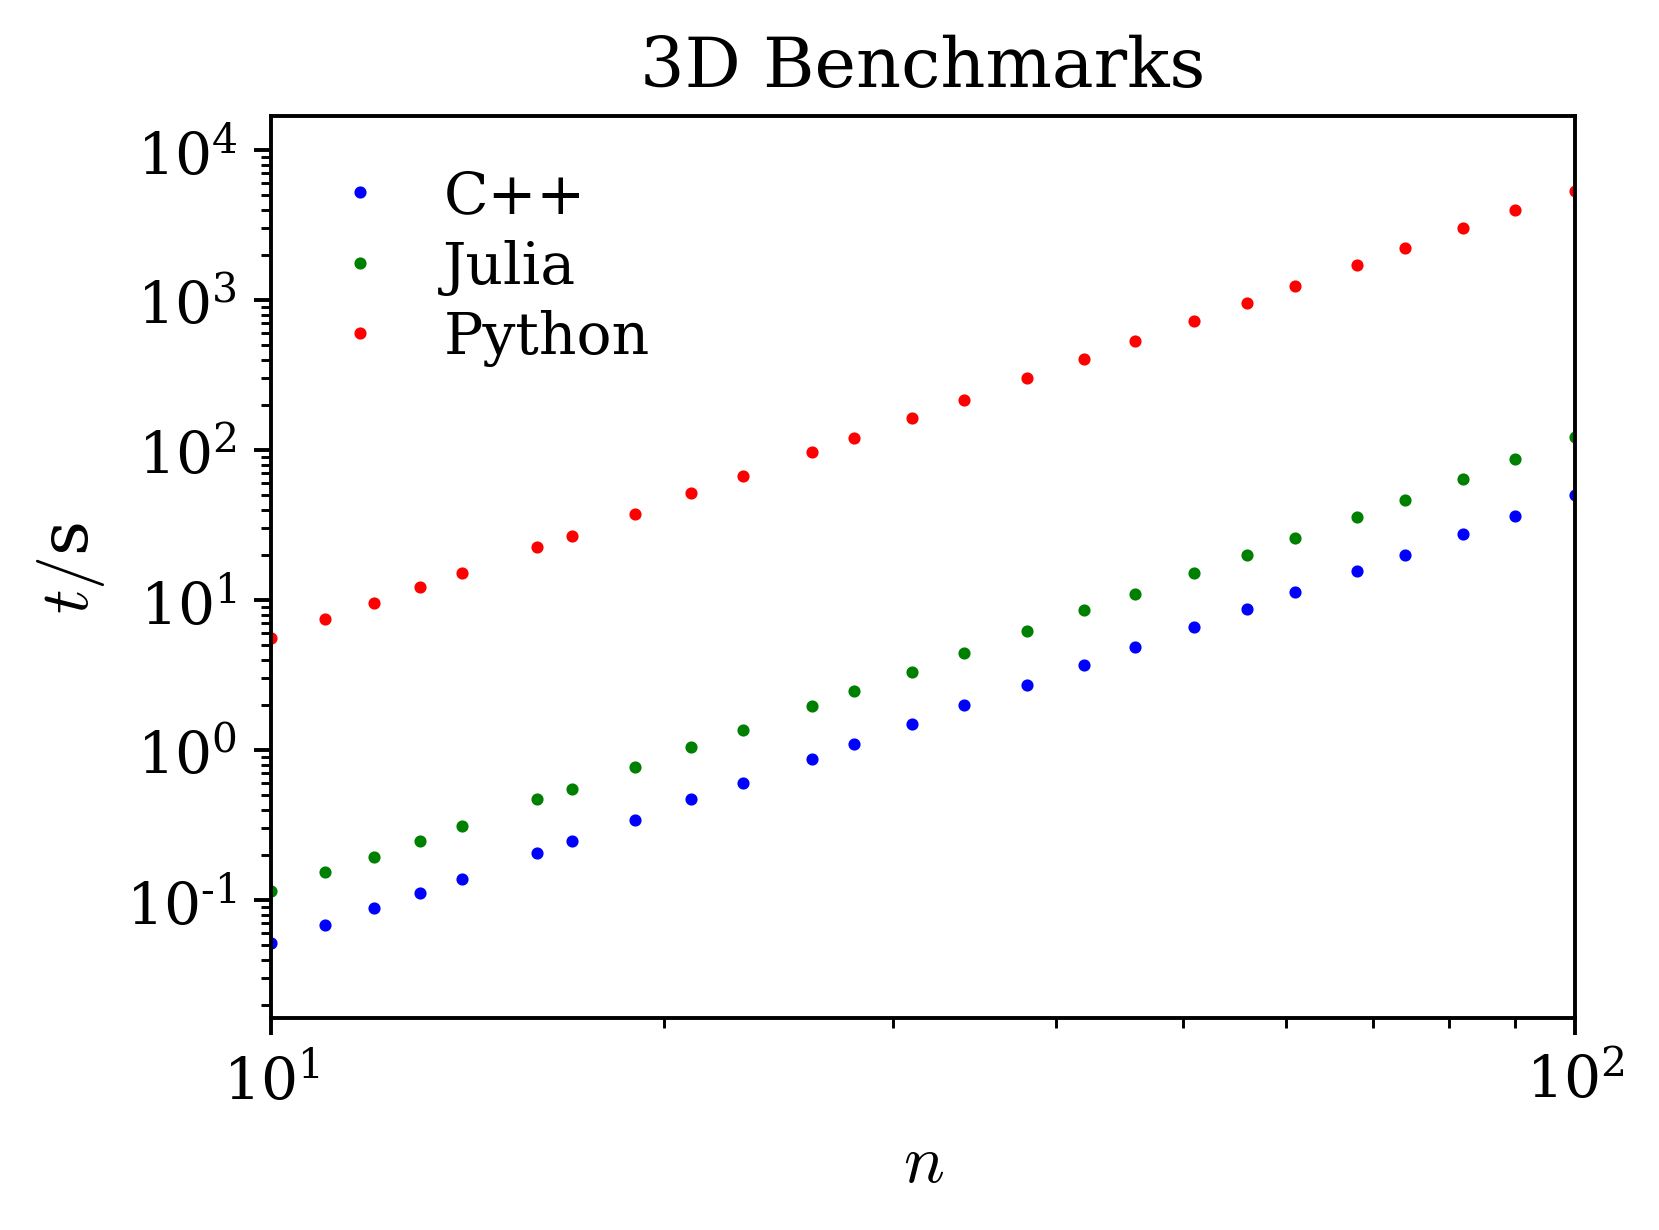

In [9]:
file = "3d/data/Sam_1000_0.1_0_3.dat"
n = []
tc = []
tj = []
tp = []
total = 0.

name = file.split("/")[-1].split("_")[0]

with open(file,"rb") as f:
    for line in f:
        n += [int(line.split()[0])]
        tc += [float(line.split()[1])]
        tj += [float(line.split()[2])]
        tp += [float(line.split()[3])]
        total += float(line.split()[1])+float(line.split()[2])+float(line.split()[3])

figurepath = '3d/figures/Sam_1000_0.1_0_3.png'
fig = plt.figure(1,tight_layout=True)
ax = fig.add_subplot(1,1,1)
plt.loglog(n,tc,'.b', label = "C++")
plt.loglog(n,tj,'.g', label = "Julia")
plt.loglog(n,tp,'.r',label="Python")
ax.set_xticklabels([],minor=True)
plt.xlabel(r'$n$')
plt.ylabel(r'$t / $s')
plt.title(rf'3D Benchmarks')
plt.legend(fontsize=12, handlelength=1.25, columnspacing=1, labelspacing=0.25)
plt.savefig(figurepath)

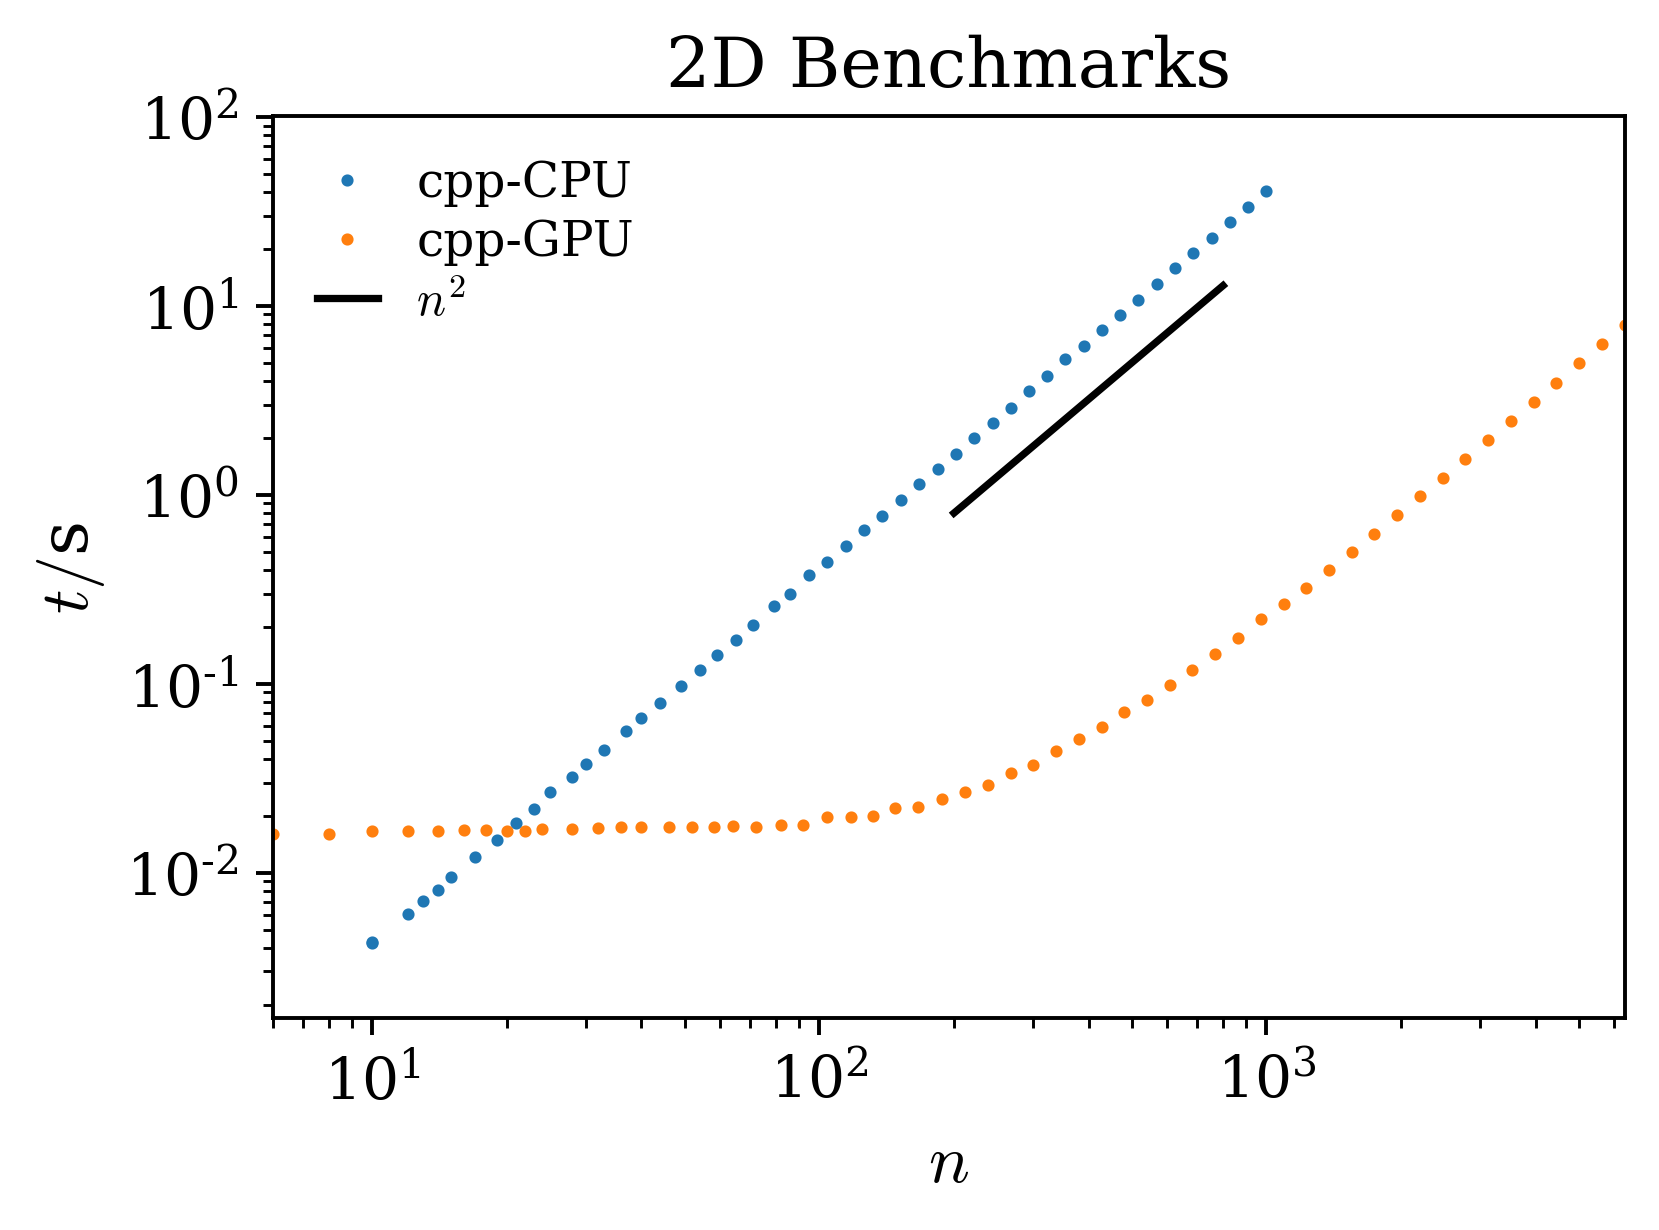

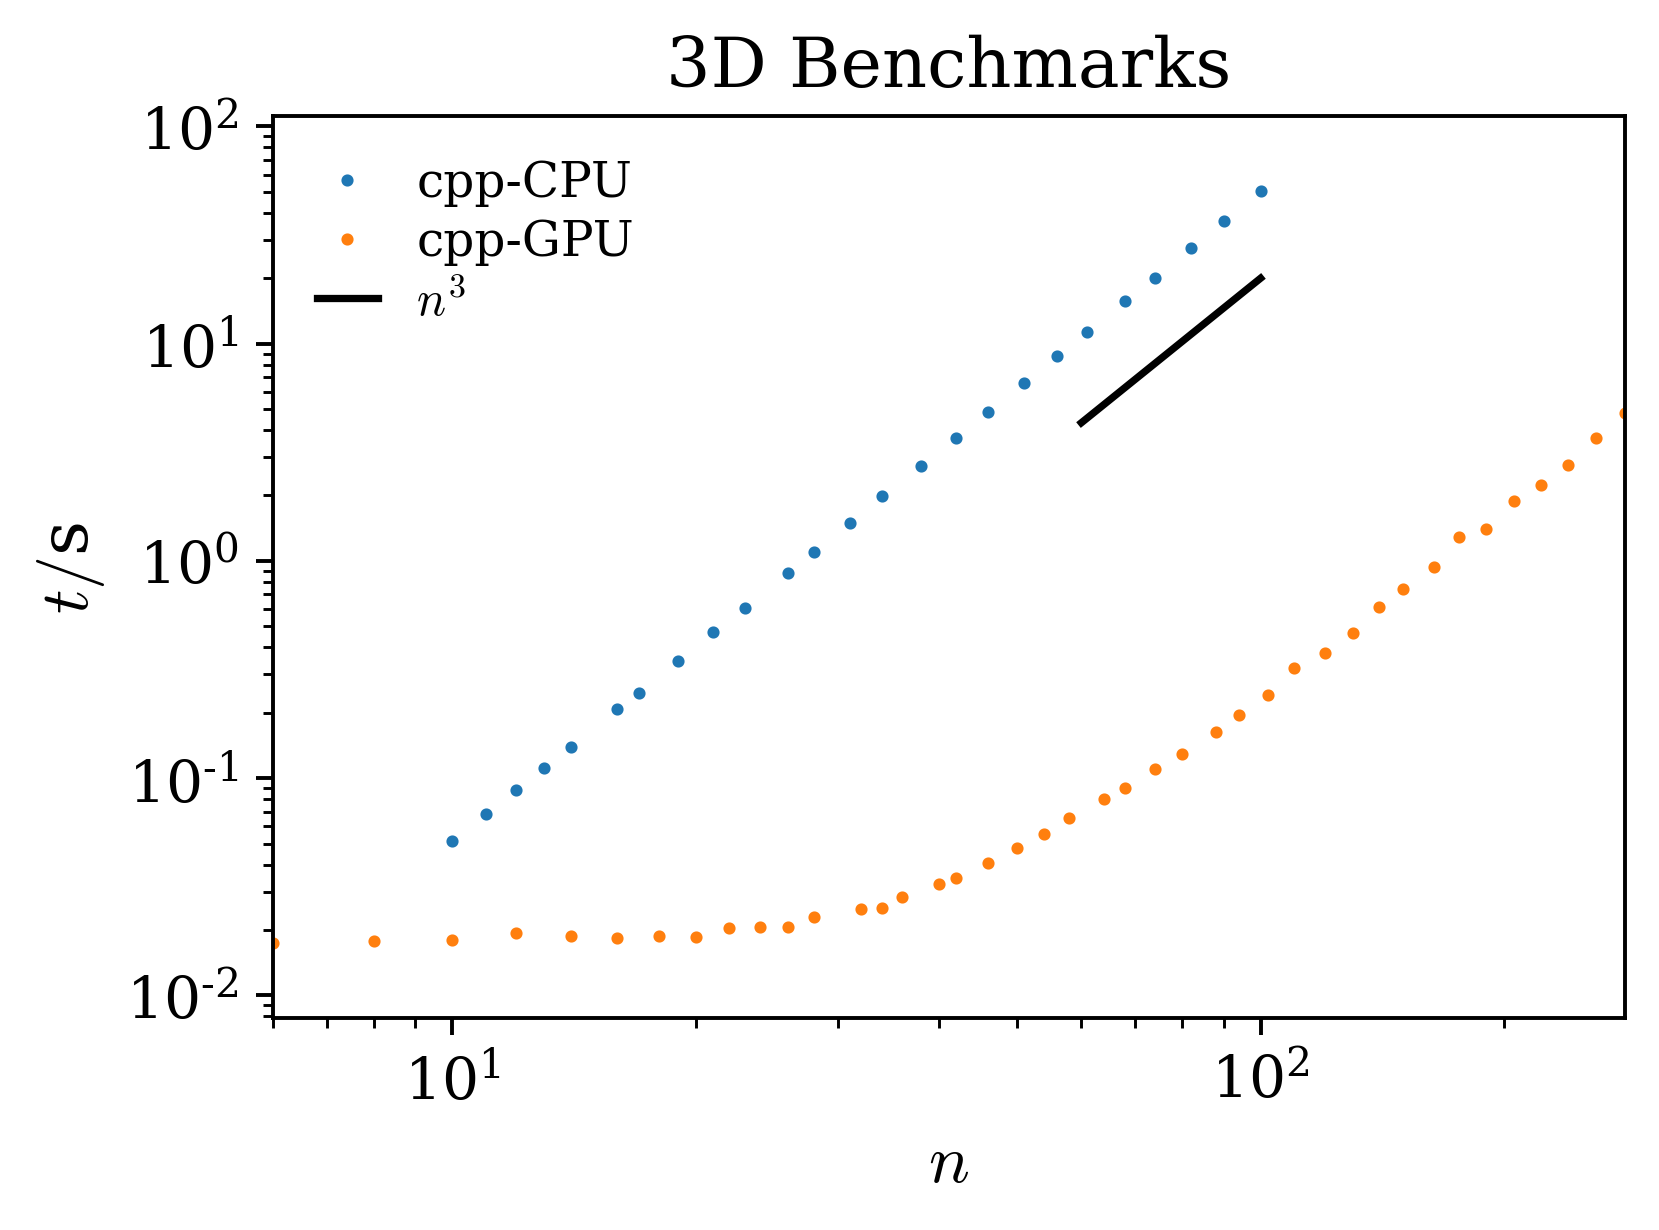

In [7]:
files = ["2d/data/Sam_CPU_1000_0.1_0_2.dat",
         "2d/data/Sam_GPU_1000_0.1_0_2.dat"]

plt.figure(1,tight_layout=True)
for file in files:
    n = []
    tc = []

    name = file.split("/")[-1].split("_")[1]

    with open(file,"rb") as f:
        for line in f:
            n += [int(line.split()[0])]
            tc += [float(line.split()[1])]
    
    p, = plt.loglog(n,tc,".",label="cpp-"+name)

x=np.linspace(200,800,2)
y=2e-5*x**2
plt.plot(x,y,'-k',label=r"$n^2$")
plt.xlabel(r'$n$')
plt.ylabel(r'$t / $s')
plt.title(rf'2D Benchmarks')
plt.legend(fontsize=10, handlelength=1.25, columnspacing=1, labelspacing=0.25)
plt.savefig("2d/figures/cpp_cpp-cuda_comparison.png")


files = ["3d/data/Sam_CPU_1000_0.1_0_3.dat",
         "3d/data/Sam_GPU_1000_0.1_0_3.dat"]

plt.figure(2,tight_layout=True)
for file in files:
    n = []
    tc = []

    name = file.split("/")[-1].split("_")[1]

    with open(file,"rb") as f:
        for line in f:
            n += [int(line.split()[0])]
            tc += [float(line.split()[1])]
    
    p, = plt.loglog(n,tc,".",label="cpp-"+name)

x=np.linspace(60,100,2)
y=2e-5*x**3
plt.plot(x,y,'-k',label=r"$n^3$")
plt.xlabel(r'$n$')
plt.ylabel(r'$t / $s')
plt.title(rf'3D Benchmarks')
plt.legend(fontsize=10, handlelength=1.25, columnspacing=1, labelspacing=0.25)
plt.savefig("3d/figures/cpp_cpp-cuda_comparison.png")

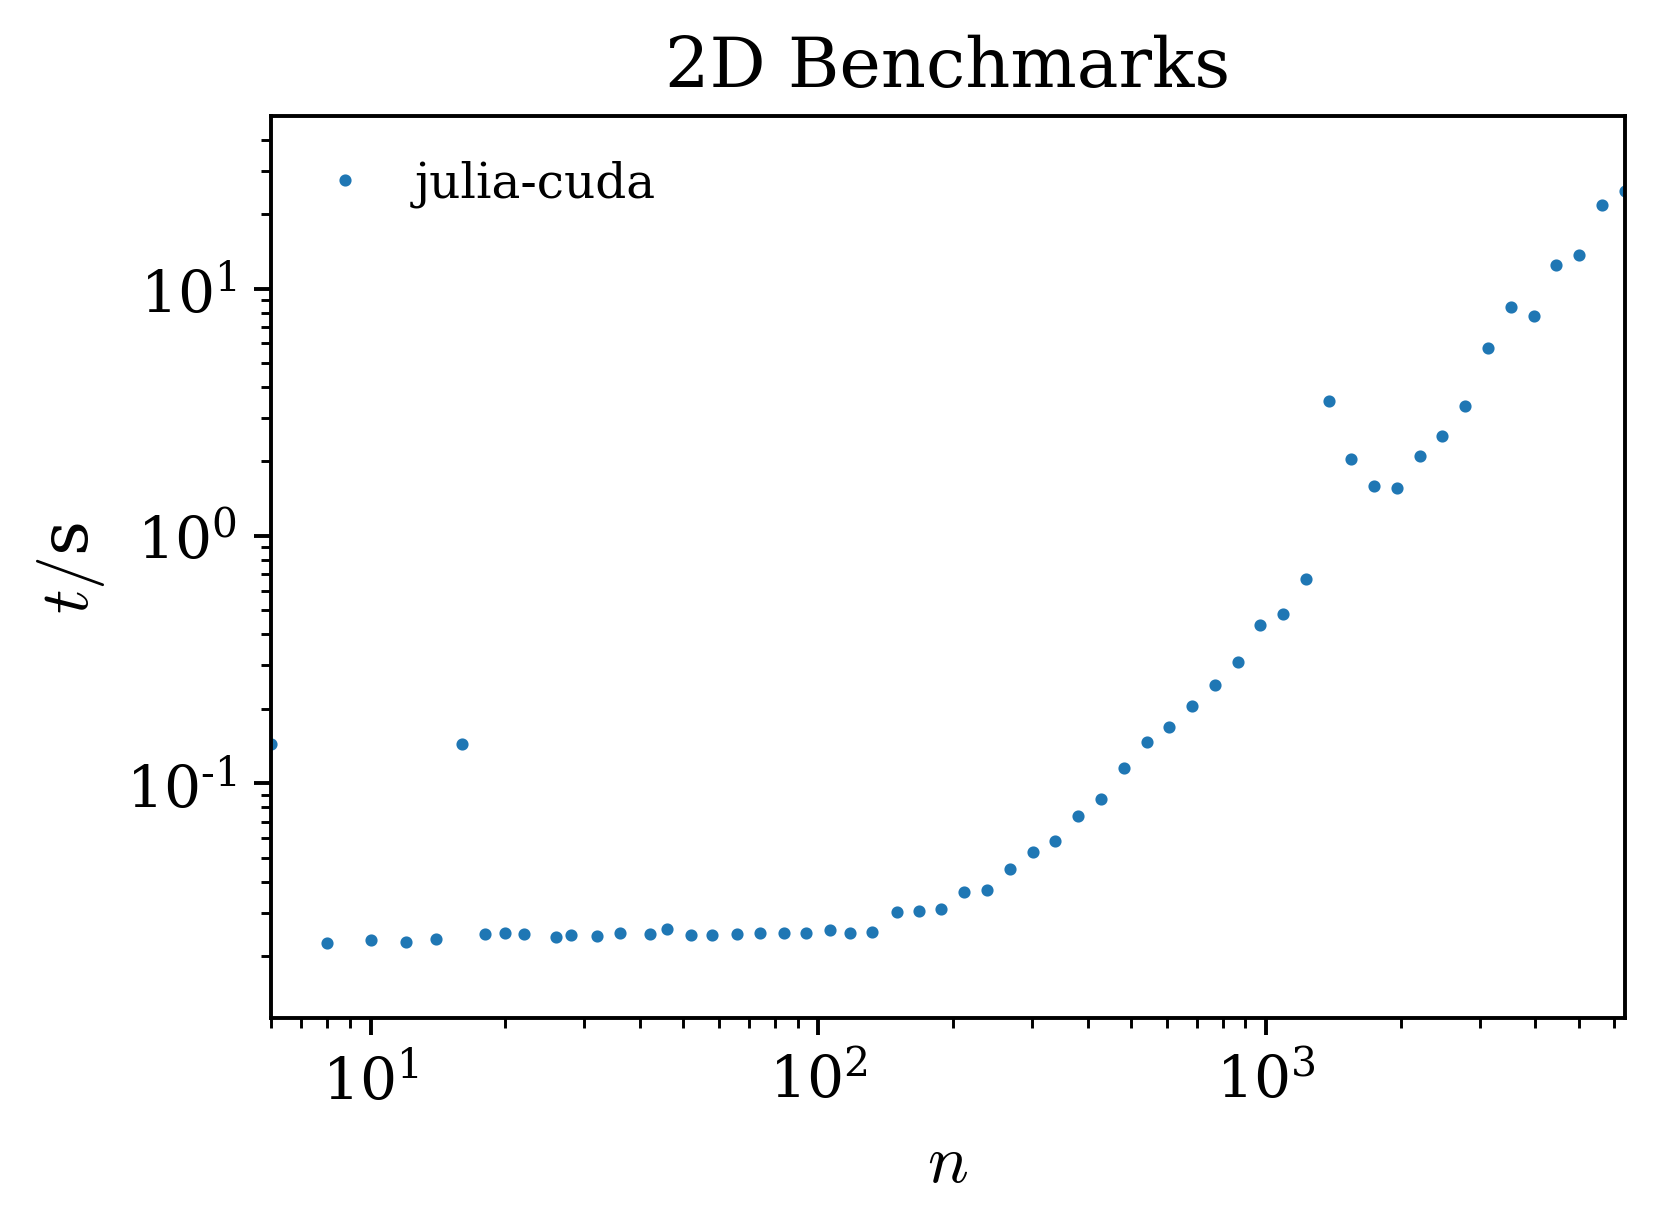

In [9]:
files = ["2d/data/julia_gpu_output.dat"]

plt.figure(1,tight_layout=True)
for file in files:
    n = []
    tc = []

    name = "julia-cuda"

    with open(file,"rb") as f:
        for line in f:
            n += [int(line.split()[0])]
            tc += [float(line.split()[1])]
    
    p, = plt.loglog(n,tc,".",label=name)

x=np.linspace(200,800,2)
y=2e-5*x**2
# plt.plot(x,y,'-k',label=r"$n^2$")
plt.xlabel(r'$n$')
plt.ylabel(r'$t / $s')
plt.title(rf'2D Benchmarks')
plt.legend(fontsize=10, handlelength=1.25, columnspacing=1, labelspacing=0.25)
plt.savefig("2d/figures/julia_gpu_2d_benchmark.png")